# Find TRI facilities near US Rivers

In [106]:
%matplotlib inline

import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import mapping
import shapely.speedups
import matplotlib.pyplot as plt
import timeit

# change default figsize
plt.rcParams['figure.figsize'] = (15, 12)

In [107]:
# read state and river shapefiles into notebook
states = gpd.read_file('http://www2.census.gov/geo/tiger/GENZ2017/shp/cb_2017_us_state_20m.zip')

# main river shapefile
rivers = gpd.read_file('https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/physical/ne_10m_rivers_lake_centerlines.zip')

# north american supplementary river shapefile
supp = gpd.read_file('https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/physical/ne_10m_rivers_north_america.zip')

# main lake shapefile
# lakes = gpd.read_file('https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/physical/ne_10m_lakes.zip')

# north american supplementary lake shapefile
# supp_lakes = gpd.read_file('https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/physical/ne_10m_lakes_north_america.zip')

In [108]:
# check crs of river and lake shapefiles
print(rivers.crs)
print(supp.crs)
# print(lakes.crs)
# print(supp_lakes.crs)

{'init': 'epsg:4326'}
{'init': 'epsg:4326'}


In [109]:
# concatenate the two river shapefiles
all_rivers = gpd.GeoDataFrame(pd.concat([rivers, supp], ignore_index=True))

# define crs for new concatenated shapefile
all_rivers.crs = {'init' :'epsg:4326'}

all_rivers

,dissolve,scalerank,featurecla,name,name_alt,rivernum,note,min_zoom,name_en,min_label,...,name_sv,name_tr,name_vi,name_zh,wdid_score,ne_id,geometry,name_full,strokeweig,uident
0,0River,1.0,River,Irrawaddy Delta,None,0,None,2.0,Irrawaddy,3.0,...,Irrawaddy,İravadi Nehri,Sông Ayeyarwaddy,伊洛瓦底江,2,1159109417,"MULTILINESTRING ((95.45110 17.82050, 95.42766 ...",NaN,NaN,NaN
1,1001Lake Centerline,9.0,Lake Centerline,Tonle Sap,None,1001,None,7.1,None,8.1,...,None,None,None,None,4,1159109429,"MULTILINESTRING ((103.68743 13.22468, 103.7133...",NaN,NaN,NaN
2,1001River,9.0,River,Tonle Sap,None,1001,None,7.1,None,8.1,...,None,None,None,None,4,1159109445,"LINESTRING (104.61476 12.38203, 104.61769 12.3...",NaN,NaN,NaN
3,1002Lake Centerline,9.0,Lake Centerline,Sheksna,None,1002,None,7.1,Sheksna,8.1,...,Sjeksna,None,None,舍克斯納河,4,1159109447,"LINESTRING (37.73951 59.07954, 37.75733 59.103...",NaN,NaN,NaN
4,1002River,9.0,River,Sheksna,None,1002,None,7.1,Sheksna,8.1,...,Sjeksna,None,None,舍克斯納河,4,1159109461,"LINESTRING (38.47804 59.21666, 38.48528 59.228...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6710,23270Lake Centerline,11.0,Lake Centerline,None,None,23270,None,6.7,None,7.7,...,None,None,None,None,0,1159145985,"LINESTRING (-92.29186 48.24982, -92.29190 48.2...",None,0.2,0.0
6711,23271Lake Centerline,11.0,Lake Centerline,None,None,23271,None,6.7,None,7.7,...,None,None,None,None,0,1159145989,"LINESTRING (-92.46329 48.32962, -92.46349 48.3...",None,0.2,0.0
6712,23285Lake Centerline,11.0,Lake Centerline,Romaine,None,23285,None,6.7,Romaine,7.7,...,Rivière Romaine,None,None,None,4,1159145995,"LINESTRING (-63.83446 52.09345, -63.83202 52.1...",Rivire Romaine,0.2,0.0
6713,23291Lake Centerline,11.0,Lake Centerline,None,None,23291,None,6.7,None,7.7,...,None,None,None,None,0,1159145999,"LINESTRING (-68.40331 53.19355, -68.45311 53.2...",None,0.2,0.0


In [110]:
# # concatenate the two lake shapefiles
# all_lakes = gpd.GeoDataFrame(pd.concat([lakes, supp_lakes], ignore_index=True))

# # define crs for new concatenated shapefile
# all_lakes.crs = {'init' :'epsg:4326'}

# all_lakes

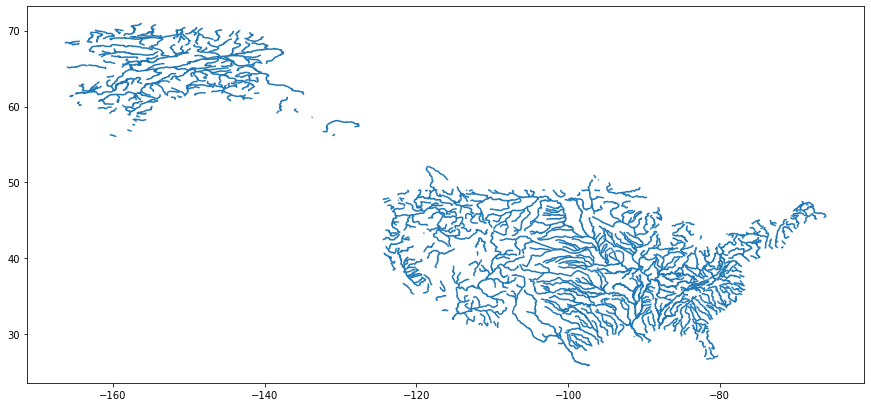

In [111]:
# create clipping mask from the states layer
states_poly = states.geometry.unary_union

# define us_rivers as those that intersect the states_poly clipping mask
us_rivers = all_rivers[all_rivers.geometry.intersects(states_poly)]

# plot results to check
us_rivers.plot();

In [112]:
# # define us_lakes as those that intersect the states_poly clipping mask
# us_lakes = all_lakes[all_lakes.geometry.intersects(states_poly)]

# # plot results to check
# us_lakes.plot();

In [113]:
# read tri data in
tri = gpd.read_file('../data/tri-facilities.geojson')

In [114]:
# check crs of each layer
print(us_rivers.crs)
# print(us_lakes.crs)
print(states.crs)
print(tri.crs)

{'init': 'epsg:4326'}
{'init': 'epsg:4269'}
{'init': 'epsg:4326'}


In [115]:
# # project each layer to equidistant projection because I want to measure distance
# states_eqdc = states.to_crs('+proj=eqdc +lat_0=39 +lon_0=-96 +lat_1=33 +lat_2=45 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs')
# tri_eqdc = tri.to_crs('+proj=eqdc +lat_0=39 +lon_0=-96 +lat_1=33 +lat_2=45 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs')
# us_rivers_eqdc = us_rivers.to_crs('+proj=eqdc +lat_0=39 +lon_0=-96 +lat_1=33 +lat_2=45 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs')
# # us_lakes_eqdc = us_lakes.to_crs('+proj=eqdc +lat_0=39 +lon_0=-96 +lat_1=33 +lat_2=45 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs')

# #check crs of each re-projected layer
# print(us_rivers_eqdc.crs)
# # print(us_lakes_eqdc.crs)
# print(states_eqdc.crs)
# print(tri_eqdc.crs)

+proj=eqdc +lat_0=39 +lon_0=-96 +lat_1=33 +lat_2=45 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs
+proj=eqdc +lat_0=39 +lon_0=-96 +lat_1=33 +lat_2=45 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs
+proj=eqdc +lat_0=39 +lon_0=-96 +lat_1=33 +lat_2=45 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs


In [131]:
# project each layer to equidistant projection because I want to measure distance
states_eqdc = states.to_crs({'init': 'epsg:4087'})
tri_eqdc = tri.to_crs({'init': 'epsg:4087'})
us_rivers_eqdc = us_rivers.to_crs({'init': 'epsg:4087'})
# us_lakes_eqdc = us_lakes.to_crs('+proj=eqdc +lat_0=39 +lon_0=-96 +lat_1=33 +lat_2=45 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs')

#check crs of each re-projected layer
print(us_rivers_eqdc.crs)
# print(us_lakes_eqdc.crs)
print(states_eqdc.crs)
print(tri_eqdc.crs)

{'init': 'epsg:4087'}
{'init': 'epsg:4087'}
{'init': 'epsg:4087'}


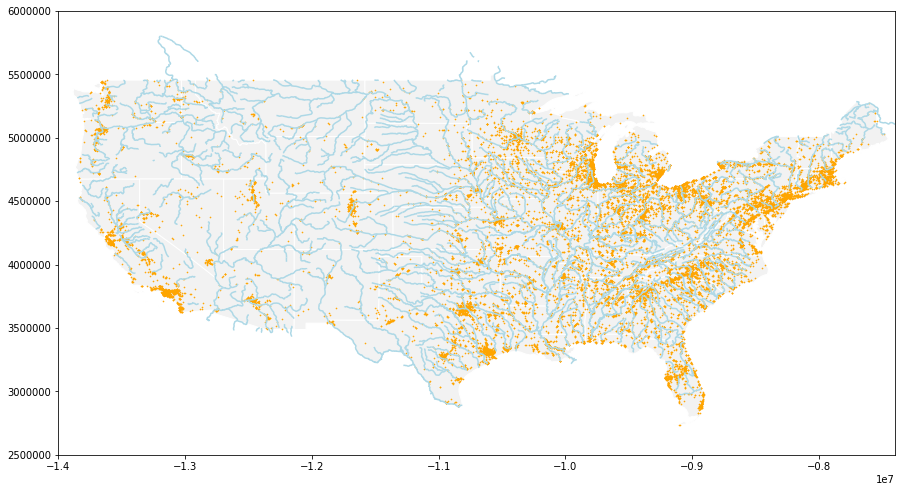

In [151]:
# plot re-projected data
fig, ax = plt.subplots()

states_eqdc.plot(ax=ax, edgecolor='white', color='#f2f2f2', zorder=0)
tri_eqdc.plot(ax=ax, color='orange', zorder=1, markersize=.4)
us_rivers_eqdc.plot(ax=ax, color='lightblue', zorder=2)
# us_lakes_eqdc.plot(ax=ax, color='#2EA1D3', zorder=3)

ax.set(xlim=(-14000000, -7400000), ylim=(2500000,6000000));

In [134]:
# define function that finds toxic sites located within 8046.72 meters of a river
# 8046.72 equals approximately 5 miles
# using solution from lesson challenge
def find_toxic_sites(site_frame, feature_frame):
    
    new_rows = []

    feature_frame_poly = feature_frame.geometry.unary_union
    
    for index, row in site_frame.iterrows():
        new_row = row
        if row['geometry'].distance(feature_frame_poly) < 8046.72:
            new_rows.append(new_row.values)

    located_sites = gpd.GeoDataFrame(new_rows, columns=site_frame.columns).reset_index()
    
    return located_sites

In [135]:
tri_near_rivers = find_toxic_sites(tri_eqdc, us_rivers_eqdc)

# set crs for tri near rivers
tri_near_rivers.crs = {'init': 'epsg:4087'}

In [119]:
# tri_near_lakes = find_toxic_sites(tri_eqdc, us_lakes_eqdc)

# # set crs for tri near lakes
# tri_near_lakes.crs = {'+proj=eqdc +lat_0=39 +lon_0=-96 +lat_1=33 +lat_2=45 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs'}

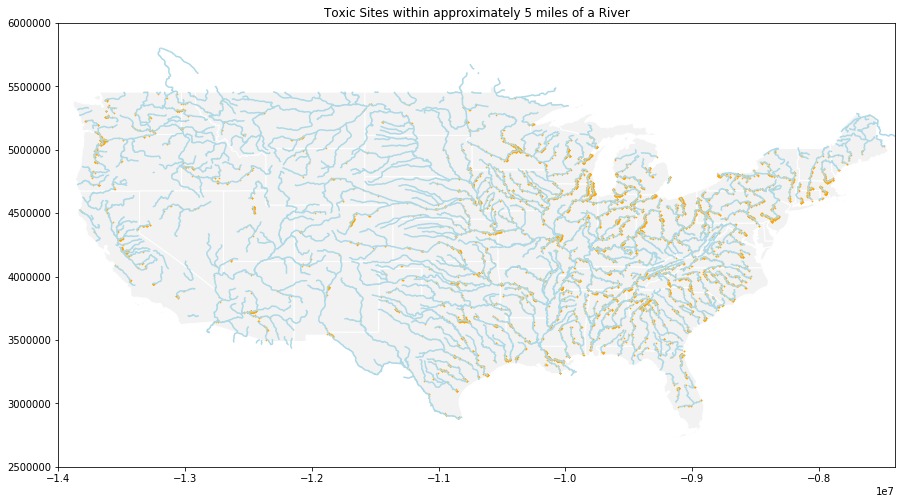

In [152]:
#plot data again using the data returned from my function
fig, ax = plt.subplots()

states_eqdc.plot(ax=ax, edgecolor='white', color='#f2f2f2', zorder=0)
tri_near_rivers.plot(ax=ax, color='orange', zorder=1, markersize=.4)
us_rivers_eqdc.plot(ax=ax, color='lightblue', zorder=2)

ax.set(xlim=(-14000000, -7400000), ylim=(2500000,6000000), title='Toxic Sites within approximately 5 miles of a River');

In [137]:
print(tri_near_rivers.crs)

{'init': 'epsg:4087'}


In [122]:
tri_near_rivers

,index,TRIFID,YEAR,FACILITY_NAME,STREET_ADDRESS,CITY,COUNTY,ST,ZIP,BIA,...,LATITUDE,LONGITUDE,INDUSTRY_SECTOR,CHEMICAL,PARENT_CO_NAME,RSEI_SCORE,RSEI_FACILITY_REPORT,RSEI_SCORE_CANCER,RSEI_SCORE_NONCANCER,geometry
0,0,01001HPHDN233MA,2018,HP HOOD LLC - AGAWAM PLANT,233 MAIN ST,AGAWAM,HAMPDEN,MA,1001,,...,42.084690,-72.618970,Food,NITRIC ACID,HP HOOD LLC,0.000000,https://enviro.epa.gov/enviro/rsei.html?facid=...,0.000000,0.000000,POINT (1905521.133 588128.976)
1,1,01001LYMPC153BO,2018,OMG INC,153 BOWLES RD,AGAWAM,HAMPDEN,MA,1001,,...,42.056694,-72.654536,Fabricated Metals,AMMONIA,STEEL PARTNERS,0.183889,https://enviro.epa.gov/enviro/rsei.html?facid=...,0.000000,0.183889,POINT (1903473.475 584378.136)
2,2,01007NRTHS201OL,2018,NORTHEAST TREATERS INC,201 OLD SPRINGFIELD RD,BELCHERTOWN,HAMPSHIRE,MA,1007,,...,42.261490,-72.405260,Wood Products,COPPER COMPOUNDS,NORTHEAST TREATERS INC,0.000000,https://enviro.epa.gov/enviro/rsei.html?facid=...,0.000000,0.000000,POINT (1917525.855 611598.714)
3,3,01007NVRSL149BA,2018,UFP BELCHERTOWN LLC,155 BAY RD,BELCHERTOWN,HAMPSHIRE,MA,1007,,...,42.301480,-72.424140,Wood Products,COPPER COMPOUNDS,UNIVERSAL FOREST PRODUCTS INC,0.000000,https://enviro.epa.gov/enviro/rsei.html?facid=...,0.000000,0.000000,POINT (1914890.359 615496.399)
4,4,01013HRCLS1111G,2018,SOLENIS LLC,1111 GRATTAN ST,CHICOPEE,HAMPDEN,MA,1013,,...,42.181944,-72.609167,Chemicals,"EPICHLOROHYDRIN, AMMONIA, FORMIC ACID",,1037.782623,https://enviro.epa.gov/enviro/rsei.html?facid=...,1037.671452,844.380928,POINT (1903562.314 598783.089)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9144,9144,99705PTRST1200H,2018,PETRO STAR INC NORTH POLE REFINERY,1200 H & H LN,NORTH POLE,FAIRBANKS NORTH STAR BORO,AK,99705,,...,64.733253,-147.344964,Petroleum,"MERCURY and MERCURY COMPOUNDS, POLYCYCLIC ARO...",ARCTIC SLOPE REGIONAL CORP,619.654750,https://enviro.epa.gov/enviro/rsei.html?facid=...,619.405188,2.267982,POINT (-2665593.779 3633861.495)
9145,9145,9970WGLDNV119HH,2018,GOLDEN VALLEY ELECTRIC ASSOC NORTH POLE POWER ...,1150 H & H LN,NORTH POLE,FAIRBANKS NORTH STAR BORO,AK,99705,,...,64.735968,-147.348622,Electric Utilities,"POLYCYCLIC AROMATIC COMPOUNDS, BENZENE, CYCLOH...",GOLDEN VALLEY ELECTRIC ASSOC,172.487613,https://enviro.epa.gov/enviro/rsei.html?facid=...,172.483391,0.656634,POINT (-2665601.632 3634224.381)
9146,9146,9970WMLSNP25HLL,2018,EMULSION PRODUCTS CO - NORTH POLE FACILITY,2500 HOLLAND AVIATION STREET,NORTH POLE,FAIRBANKS NORTH STAR BORO,AK,99705,,...,64.762530,-147.392920,Petroleum,"POLYCYCLIC AROMATIC COMPOUNDS, BENZO(G,H,I)PER...",COLASKA,185.674877,https://enviro.epa.gov/enviro/rsei.html?facid=...,185.674877,0.000000,POINT (-2666070.898 3638023.078)
9147,9147,99737PGMNX38MIL,2018,POGO MINE,38 MILES NE OF DELTA JUNCTION,DELTA JUNCTION,FAIRBANKS NORTH STAR BORO,AK,99737,,...,64.449722,-144.939623,Metal Mining,"PROPYLENE, MERCURY and MERCURY COMPOUNDS, COB...",SUMITOMO METAL MINING AMERICA INC,173.503022,https://enviro.epa.gov/enviro/rsei.html?facid=...,173.491817,2.667581,POINT (-2569443.473 3537872.658)


In [138]:
# project rivers and tri near rivers to WGS84 for webmapping
tri_near_rivers.to_crs({'init': 'epsg:4326'})
us_rivers.to_crs({'init': 'epsg:4326'})

,dissolve,scalerank,featurecla,name,name_alt,rivernum,note,min_zoom,name_en,min_label,...,name_sv,name_tr,name_vi,name_zh,wdid_score,ne_id,geometry,name_full,strokeweig,uident
15,1008River,9.0,River,Sagavanirktok,None,1008,None,7.1,Sagavanirktok,8.1,...,None,None,None,None,4,1159109603,"LINESTRING (-148.90897 68.18073, -148.87670 68...",NaN,NaN,NaN
16,1009River,9.0,River,Meade,None,1009,None,7.1,Meade,8.1,...,None,None,None,None,4,1159109611,"LINESTRING (-158.48245 69.27005, -158.48107 69...",NaN,NaN,NaN
18,1010River,9.0,River,S. Fork Kuskokwim,None,1010,None,7.1,S. Fork Kuskokwim,8.1,...,None,None,None,None,0,1159109647,"LINESTRING (-153.14798 61.54788, -153.12259 61...",NaN,NaN,NaN
51,103Lake Centerline,4.0,Lake Centerline,Snake,None,103,None,4.0,Snake,5.0,...,Snake,None,Sông Snake,斯内克河,4,1159110075,"MULTILINESTRING ((-111.04141 43.17499, -111.06...",NaN,NaN,NaN
52,103River,4.0,River,Snake,None,103,None,4.0,Snake,5.0,...,Snake,None,Sông Snake,斯内克河,4,1159110085,"MULTILINESTRING ((-119.05207 46.22382, -119.02...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6708,23269Lake Centerline,11.0,Lake Centerline,None,None,23269,None,6.7,None,7.7,...,None,None,None,None,0,1159145975,"LINESTRING (-91.42878 48.03673, -91.46467 48.0...",None,0.2,0.0
6709,23269Lake Centerline,11.0,Lake Centerline,None,None,23269,None,6.7,None,7.7,...,None,None,None,None,0,1159145981,"LINESTRING (-90.85855 48.22687, -90.87890 48.2...",None,0.2,0.0
6710,23270Lake Centerline,11.0,Lake Centerline,None,None,23270,None,6.7,None,7.7,...,None,None,None,None,0,1159145985,"LINESTRING (-92.29186 48.24982, -92.29190 48.2...",None,0.2,0.0
6711,23271Lake Centerline,11.0,Lake Centerline,None,None,23271,None,6.7,None,7.7,...,None,None,None,None,0,1159145989,"LINESTRING (-92.46329 48.32962, -92.46349 48.3...",None,0.2,0.0


In [139]:
# export geodataframe to geojson for further exploration
tri_near_rivers.to_file("../data/tri-near-rivers.geojson", driver='GeoJSON', encoding='utf-8')
us_rivers.to_file("../data/us-rivers.geojson", driver='GeoJSON', encoding='utf-8')